In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:

data = pd.read_csv('Cancer_DS.csv')

X = data.drop(columns=['id','diagnosis','Unnamed: 32'])
y = data['diagnosis']


In [6]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:


svm_rbf = SVC(kernel='rbf', gamma='scale')
svm_rbf.fit(X_train, y_train)



SVC()

In [8]:

y_pred_rbf = svm_rbf.predict(X_test)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
class_report_rbf = classification_report(y_test, y_pred_rbf)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)


In [9]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)


SVC(kernel='linear')

In [10]:
y_pred_linear = svm_linear.predict(X_test)
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
class_report_linear = classification_report(y_test, y_pred_linear)
accuracy_linear = accuracy_score(y_test, y_pred_linear)


In [11]:
print("Results for SVM with RBF kernel:")
print("Confusion Matrix:\n", conf_matrix_rbf)
print("\nClassification Report:\n", class_report_rbf)
print("Accuracy:", accuracy_rbf)

print("\n----------------------------------------\n")

print("Results for SVM with Linear kernel:")
print("Confusion Matrix:\n", conf_matrix_linear)
print("\nClassification Report:\n", class_report_linear)
print("Accuracy:", accuracy_linear)


Results for SVM with RBF kernel:
Confusion Matrix:
 [[71  0]
 [ 6 37]]

Classification Report:
               precision    recall  f1-score   support

           B       0.92      1.00      0.96        71
           M       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy: 0.9473684210526315

----------------------------------------

Results for SVM with Linear kernel:
Confusion Matrix:
 [[70  1]
 [ 4 39]]

Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.99      0.97        71
           M       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.956140350877193


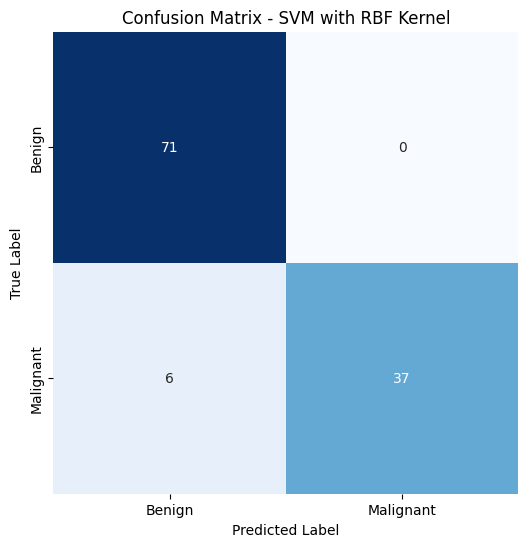

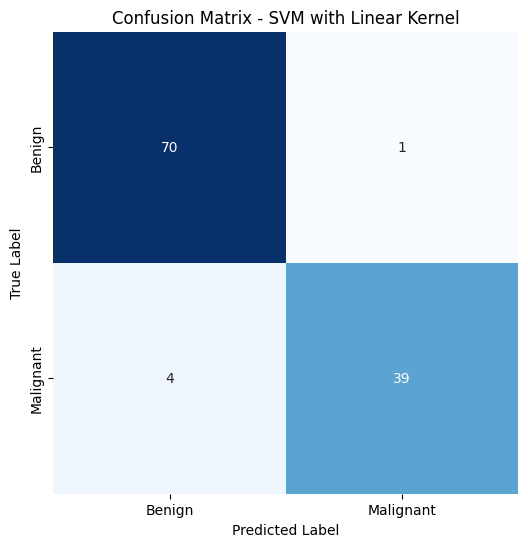

In [12]:

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


plot_confusion_matrix(conf_matrix_rbf, "Confusion Matrix - SVM with RBF Kernel")


plot_confusion_matrix(conf_matrix_linear, "Confusion Matrix - SVM with Linear Kernel")